In [1]:
import pandas as pd
from influxdb import InfluxDBClient


def get_data(query):
    # Connect to InfluxDB and fetch data
    client = InfluxDBClient(host='localhost', port=8086)
    client.switch_database('ISS')
    
    results = client.query(query)
    client.close()

    return pd.DataFrame.from_records(results.get_points())

In [2]:
query = 'SELECT * FROM "DE1FlowMeterThing_HMD8310"'
me1 = get_data(query)

In [6]:
me1["FOVolumeDiff"] = me1["FOVolumeFlowIn"] - me1["FOVolumeFlowReturn"]

<Axes: >

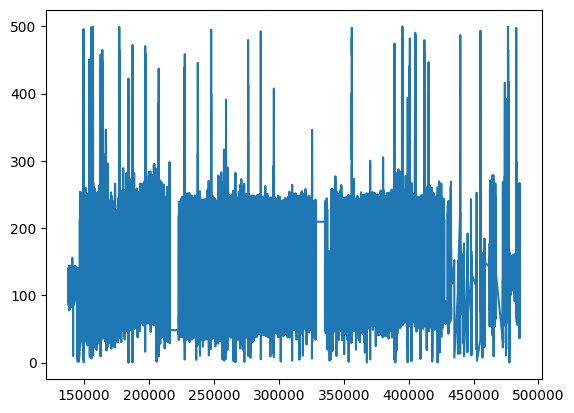

In [10]:
me1.loc[(me1["FOVolumeDiff"]<500)&(me1["FOVolumeDiff"]>0), "FOVolumeDiff"].plot()

In [12]:
me1.loc[(me1["FOVolumeDiff"]<500)&(me1["FOVolumeDiff"]>0), "FOVolumeDiff"].mean()

79.29842483846907

In [4]:
prop1 = pd.read_csv("MainEngine1Thing_HMD8310.csv")

Text(0.5, 0.98, 'SFOC')

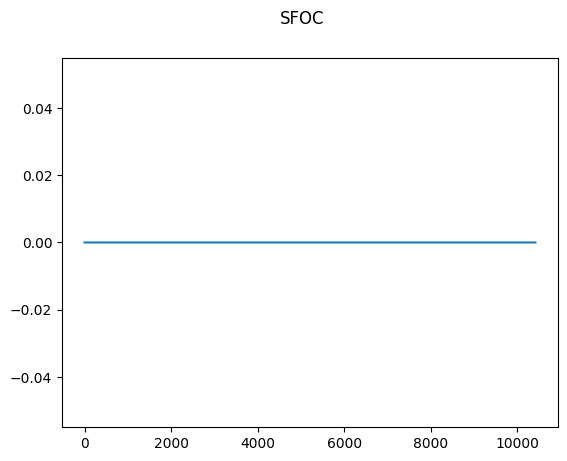

In [15]:
import matplotlib.pyplot as plt
prop1["SFOC"].plot()
plt.suptitle("SFOC")

In [9]:
for column in prop1.columns:
    print(column)

Unnamed: 0
time
BSEC
BSECISO
CFWInletPress
CFWInletTemp
CFWOutletTemp
Cy1CWTemp
Cy1ExhGasOutletTemp
Cy2CWTemp
Cy2ExhGasOutletTemp
Cy3CWTemp
Cy3ExhGasOutletTemp
Cy4CWTemp
Cy4ExhGasOutletTemp
Cy5CWTemp
Cy5ExhGasOutletTemp
Cy6CWTemp
Cy6ExhGasOutletTemp
DoUse
Efficiency
EnergyOutput
FGConsumption
FGEnergy
FGMassFlow
FGPressure
FGTemperature
FODensity
FODensity15
FOEnergy
FOInletPress
FOInletTemp
FOMassFlow
FOVolumeFlow
FilteredBSECISO
FilteredEnergyOutput
FilteredLoadPercent
FilteredPilotFuelFlow
FilteredPower
FilteredSFOC
FilteredSFOCISO
GasMode
LFOUse
LOInletPress
LOInletTemp
Load
LoadPercent
PilotFuelFlow
Power
RPM
SFOC
SFOCISO
ScavPress
ScavTemp
TotalRunningTime
valuestreamname


<Axes: >

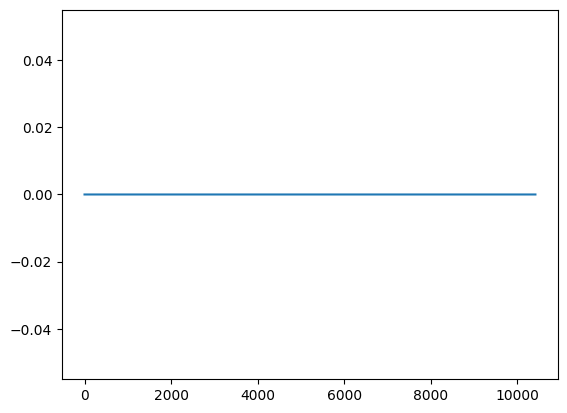

In [14]:
prop1.SFOC.plot()

In [2]:
query = 'SELECT * FROM "EP_Battery.Thing_HMD8310"'
battery_data = get_data(query)
query = 'SELECT * FROM "DG1Thing_HMD8310"'
dg1 = get_data(query)
query = 'SELECT * FROM "DE1Thing_HMD8310"'
de1 = get_data(query)


In [3]:
dg1.head()

,time,AccumulatedPower,BrgDE_Temp1,BrgDE_Temp10,BrgDE_Temp11,BrgDE_Temp2,BrgDE_Temp3,BrgDE_Temp4,BrgDE_Temp5,BrgDE_Temp6,...,SFC1_VOL_ACTUAL_VALUE,TotalRunningTime,Voltage,WCU_ALARM,WCU_TRIP,WindingTempR,WindingTempS,WindingTempT,busBarVoltage,valuestreamname
0,2022-08-19T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,None,None,0.0,0.0,0.0,0.0,ISS.Onshore.Model.VS
1,2022-08-19T00:01:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,None,None,0.0,0.0,0.0,0.0,ISS.Onshore.Model.VS
2,2022-08-19T00:02:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,None,None,0.0,0.0,0.0,0.0,ISS.Onshore.Model.VS
3,2022-08-19T00:03:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,None,None,0.0,0.0,0.0,0.0,ISS.Onshore.Model.VS
4,2022-08-19T00:04:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,None,None,0.0,0.0,0.0,0.0,ISS.Onshore.Model.VS


In [4]:
for column in dg1.columns:
    print(column)

time
AccumulatedPower
BrgDE_Temp1
BrgDE_Temp10
BrgDE_Temp11
BrgDE_Temp2
BrgDE_Temp3
BrgDE_Temp4
BrgDE_Temp5
BrgDE_Temp6
BrgDE_Temp7
BrgDE_Temp8
BrgDE_Temp9
Current
Current_U
Current_V
Current_W
DieselMode
Efficiency
Frequency
GE1_ALARM
GE1_HEATERS_CONN
GE1_LOCAL___REMOTE
GE1_POWER_ACTUAL_VALUE
GE1_PULSES_ON
GE1_RFU
GE1_SLOWDOWN
GE1_TRIP
GE2_POWER_ACTUAL_VALUE
GasOpeationReady
GenPower
LoadPercent
NO1_DC_BUS_VOL
NO1_G_E_ACTUAL_LOAD_TO_ENGINE
NO1_G_E_COOLING_AIR_TEMP
NO1_G_E_SPEED_REFERENCE
NO1_G_E_STATOR_BEARING_NDE_TEMP
NO1_LV_TR_WINDING_U_TEMP
NO1_LV_TR_WINDING_V_TEMP
NO1_LV_TR_WINDING_W_TEMP
Req_DieselMode
Req_LoadReduction
Runhour
RunhourHR
Runhour_Diesel
Runhour_Division
Runhour_Gas
RunningState
SECONDARY_COLD_WATER_TEMP
SFC1_ALARM
SFC1_FREQUENCY_ACTUAL_VALUE
SFC1_LOCAL___REMOTE
SFC1_POWER_ACTUAL_VALUE
SFC1_PULSES_ON
SFC1_SHORE_MODE_ON
SFC1_TRIP
SFC1_VOL_ACTUAL_VALUE
TotalRunningTime
Voltage
WCU_ALARM
WCU_TRIP
WindingTempR
WindingTempS
WindingTempT
busBarVoltage
valuestreamname


In [7]:
dg1.Efficienc.plot()

AttributeError: 'DataFrame' object has no attribute 'efficiency'

In [6]:
for column in de1.columns:
    print(column)

time
BSEC
BSECISO
CFWInletPress
CFWInletTemp
CFWOutletTemp
CFWOutletTempA
CFWOutletTempB
CO2MassFlow
CO2_percent
Cy1ExhGasOutletTemp
Cy2ExhGasOutletTemp
Cy3ExhGasOutletTemp
Cy4ExhGasOutletTemp
Cy5ExhGasOutletTemp
Cy6ExhGasOutletTemp
Cy7ExhGasOutletTemp
Cy8ExhGasOutletTemp
Cy9ExhGasOutletTemp
Cyl1_Knock
Cyl1_Pmax
Cyl2_Knock
Cyl2_Pmax
Cyl3_Knock
Cyl3_Pmax
Cyl4_Knock
Cyl4_Pmax
Cyl5_Knock
Cyl5_Pmax
Cyl6_Knock
Cyl6_Pmax
Cyl7_Knock
Cyl7_Pmax
Cyl8_Knock
Cyl8_Pmax
Cyl9_Knock
Cyl9_Pmax
DieselMode
DoUse
Efficiency
EnergyOutput
FGConsumption
FGEnergy
FGMassFlow
FGPressure
FGTemperature
FODensity
FODensity15
FOEnergy
FOInletPress
FOInletTemp
FOMassFlow
FOVolumeFlow
GE1_CRANKCASE_PRESS
GE1_EXH_GAS_TEMP_CYL_OUT_1_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_2_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_3_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_4_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_5_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_6_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_7_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_8_H_AL
GE1_EXH_GAS_TEMP_CYL_OUT_9_H_AL
GE1_EXH_GAS_TEMP_TC_IN_H_AL
GE

<Axes: >

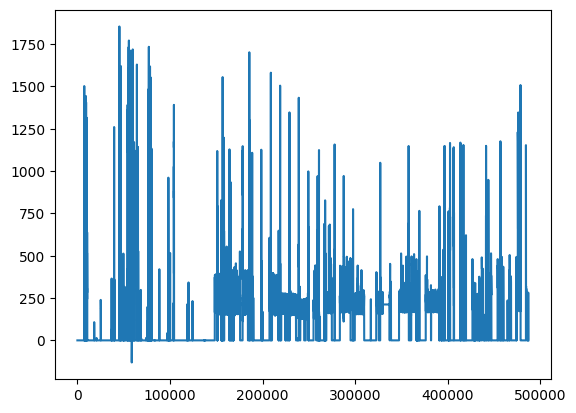

In [41]:
de1.Power.plot()

In [42]:
query = 'SELECT * FROM "UIPA.HMD8310H.Engine1"'
uipa1 = get_data(query)

In [ ]:
for column in uipa1.columns:
    print(column)